In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

points = np.array([[1,3],[1,6],[3,4],[5,2],[5,6],[7,1],[8,7],[10,3]])
C1 = np.array((2, 4))

print(points.shape[1])


#sP = set(points)
distances = np.linalg.norm(points - C1, ord=points.shape[1], axis=1.) 

print(distances)


2
[ 1.41421356  2.23606798  1.          3.60555128  3.60555128  5.83095189
  6.70820393  8.06225775]


In [10]:
centroids = np.array([[2,4],[6,7],[7,3]])
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    print(distances)
    return np.argmin(distances, axis=0)

points_centrolid = closest_centroid(points, centroids)
print(points_centrolid)


[[ 1.41421356  2.23606798  1.          3.60555128  3.60555128  5.83095189
   6.70820393  8.06225775]
 [ 6.40312424  5.09901951  4.24264069  5.09901951  1.41421356  6.08276253
   2.          5.65685425]
 [ 6.          6.70820393  4.12310563  2.23606798  3.60555128  2.
   4.12310563  3.        ]]
[0 0 0 2 1 2 1 2]


In [3]:
Cs = centroids[points_centrolid]
print(Cs)
r = np.linalg.norm(points - Cs, ord=points.shape[1], axis=1.)
print(r, max(r))

[[2 4]
 [2 4]
 [2 4]
 [7 3]
 [6 7]
 [7 3]
 [6 7]
 [7 3]]
[ 1.41421356  2.23606798  1.          2.23606798  1.41421356  2.          2.
  3.        ] 3.0


[[ 0.  0.]
 [ 5.  5.]
 [ 1.  1.]
 [ 2.  2.]
 [ 4.  1.]
 [ 3.  3.]
 [ 0.  5.]
 [ 1.  2.]]


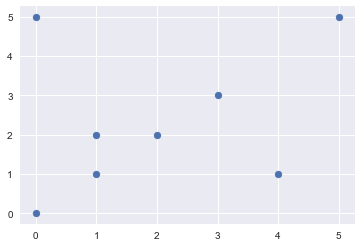

In [3]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import re

in_array='''[0.0 0.0
5.0 5.0
1.0 1.0
2.0 2.0
4.0 1.0
3.0 3.0
0.0 5.0
1.0 2.0]'''

#result=np.array(in_array)
#result=np.array(re.split("\s+", in_array.replace('[','').replace(']','')), dtype=float)
result= np.fromstring(in_array[1:-1], dtype=np.float64, sep=' ')

dim1 = 2
dim2 = int(len(result)/dim1)
result=np.reshape(result,(dim2,dim1))
print(result)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

In [6]:

def furthest_first(data,k):
    Data = np.copy(data) 
    Centroids = np.empty(dtype=np.float64,shape=(1,Data.shape[1]))
    Centroids[0] = Data[0]
    #print(Centroids)
    i = 1
    while i < k:       
        distances = np.sqrt(((Data - Centroids[:, np.newaxis])**2).sum(axis=2))
        distances = distances.sum(axis=0,keepdims=True)
        #print(distances)
        maxd = np.argmax(distances,axis=1)
        #print(maxd)
        Centroids = np.vstack([Centroids, Data[maxd]])
        i += 1
    print(Centroids)

furthest_first(result,4)    

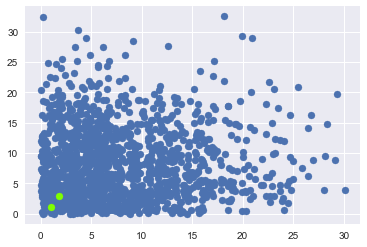

In [19]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import animation

import numpy as np

def str_to_d_vector(Str,D):
    result = np.fromstring(Str[1:-1], dtype=np.float64, sep=' ')
    dim = int(len(result)/D)
    return np.reshape(result,(dim,D))

def plot_2D_clusters(Points,Centers):
    plt.scatter(Points[:, 0], Points[:, 1])
    plt.scatter(Centers[:, 0], Centers[:, 1],color='chartreuse')
    plt.show()

    
#points = np.array([[1,3],[1,6],[3,4],[5,2],[5,6],[7,1],[8,7],[10,3]],dtype=np.float64)
#centers = np.array([[3, 4.5],[6,1.5],[9,5]])
C = '''[1.800 2.867
1.060 1.140]'''

P = '''[6.4 6.1 5.9 0.1 8.4 12.6 27.6 0.7 9.5 15.6 0.2 6.9 12.0 6.4 4.4 3.5 3.9 3.2 8.1 6.1 8.1 12.4 18.1 9.5 16.4 21.8 4.7 7.2 2.4 3.3 4.4 12.0 1.1 12.3 3.5 3.8 5.0 3.8 8.3 10.4 6.0 8.3 4.2 8.0 0.6 6.9 1.3 16.8 5.9 17.4 12.0 2.2 13.9 17.5 14.6 4.8 5.5 22.6 12.4 3.4 13.5 9.9 6.5 8.1 15.8 4.9 4.7 9.6 1.5 3.7 1.9 1.9 9.6 12.5 8.6 12.8 15.7 12.4 2.8 3.9 2.4 6.3 5.6 0.3 20.3 8.5 1.2 12.0 3.2 2.6 5.4 6.5 3.0 13.6 4.6 10.4 2.7 6.8 11.4 2.9 6.0 4.3 4.9 3.4 8.9 1.1 1.5 13.1 4.0 17.4 6.7 5.0 27.0 11.7 2.9 4.2 5.4 7.9 9.2 7.7 3.0 1.1 9.6 16.4 8.5 4.9 0.8 5.9 4.4 8.0 1.3 1.2 6.6 7.3 3.7 19.0 5.2 20.6 3.6 7.6 13.0 10.5 0.1 6.5 7.1 6.5 0.1 2.2 4.4 7.5 13.5 5.6 22.4 0.2 8.4 8.6 6.0 3.1 4.0 1.3 5.7 7.3 11.7 7.3 5.2 12.7 12.3 6.9 2.9 1.1 2.8 10.3 3.4 0.8 4.9 7.8 8.6 2.9 13.9 2.8 0.7 13.3 6.8 7.6 6.2 4.8 6.9 11.3 8.8 5.4 2.1 9.5 15.3 8.0 6.5 12.2 10.7 2.6 9.0 19.9 0.2 5.9 18.1 14.1 15.6 1.8 18.6 3.4 5.5 4.3 8.0 10.6 17.3 0.2 1.5 6.0 6.5 1.3 0.1 12.6 4.9 17.2 11.8 20.4 20.6 4.9 1.9 1.1 3.5 4.3 16.7 5.3 1.9 9.3 7.4 4.5 8.2 3.8 2.1 1.8 0.3 1.4 10.7 4.8 18.1 3.2 7.4 11.4 4.7 0.1 14.7 11.8 5.3 1.6 14.0 4.8 11.0 5.2 13.2 4.7 10.3 1.7 1.8 3.1 10.6 6.5 4.7 2.3 0.4 3.0 6.4 4.2 3.3 6.8 3.8 16.6 4.9 13.6 13.7 6.1 9.7 11.2 15.9 28.3 4.1 2.8 4.4 0.6 9.2 10.3 6.9 5.3 2.2 3.3 3.0 9.8 3.5 10.4 6.1 13.2 10.6 12.0 22.6 14.2 5.9 12.2 13.8 22.9 12.9 7.4 17.0 11.0 17.0 10.1 12.5 16.0 5.3 9.6 1.1 4.7 4.8 9.0 5.2 8.2 0.6 3.2 15.6 2.0 12.4 16.9 11.4 11.4 1.0 9.0 5.4 3.0 0.2 11.7 6.5 3.8 8.8 0.0 4.3 1.8 1.3 2.8 10.0 0.8 3.5 6.9 6.6 6.7 0.2 14.3 0.6 10.8 3.8 5.3 4.5 10.2 7.9 0.8 7.5 3.9 23.5 22.0 4.7 1.6 1.8 3.8 11.4 4.5 7.8 16.5 9.6 11.0 1.9 4.2 16.3 4.5 10.3 2.3 13.5 0.2 8.2 0.4 7.0 4.1 11.9 2.3 8.4 14.2 8.8 11.5 2.5 14.6 2.6 7.8 11.5 5.5 14.7 2.7 1.4 0.8 2.8 0.9 14.7 1.1 9.4 7.7 17.8 8.0 0.9 8.0 8.0 16.2 8.1 2.1 12.2 16.2 5.3 2.2 1.9 9.2 13.2 1.2 7.1 6.9 12.8 9.9 5.5 8.6 7.0 7.6 2.3 2.7 8.5 9.9 1.7 15.1 9.1 4.8 2.6 23.1 12.9 3.3 8.1 12.7 7.4 7.6 1.2 2.7 10.8 8.0 3.4 3.6 25.1 8.6 8.1 20.2 16.7 10.2 2.5 0.6 5.5 0.4 12.1 2.9 5.4 4.4 10.0 4.7 3.8 4.2 2.0 9.5 4.0 6.2 5.5 5.6 5.6 12.0 1.8 4.2 11.5 9.6 6.9 9.1 1.9 12.3 6.3 7.6 5.5 16.8 6.5 3.5 18.0 1.3 9.8 16.1 16.1 0.7 2.1 3.5 3.8 15.8 23.5 7.8 8.2 3.8 1.7 2.4 14.4 5.6 4.3 16.0 8.9 13.7 1.1 4.2 12.3 2.9 12.0 2.5 12.4 6.4 5.5 12.3 4.4 4.7 4.2 7.0 1.8 2.9 5.3 16.1 12.3 10.6 7.4 4.3 9.5 14.7 6.2 12.4 17.2 5.1 1.0 5.1 13.4 16.2 3.6 4.7 18.3 4.7 7.1 18.5 17.7 2.9 6.1 11.1 12.5 4.6 0.5 3.4 2.5 0.8 16.3 10.9 13.3 16.6 4.8 10.1 8.5 8.5 11.6 10.3 1.6 0.0 2.0 13.7 10.4 8.3 3.5 7.1 12.9 3.0 7.2 13.4 2.1 3.9 5.8 5.5 5.3 19.7 3.4 5.9 15.8 8.9 7.7 1.7 12.0 10.2 20.1 6.0 16.2 10.4 1.9 0.6 24.3 11.0 4.6 5.6 9.2 4.9 16.4 10.7 6.7 3.6 10.7 16.8 7.5 0.5 2.1 9.4 10.4 3.7 15.2 6.1 7.3 10.9 2.8 2.1 19.4 1.9 6.0 12.0 2.3 6.4 2.2 1.0 2.9 2.6 8.1 6.6 7.9 7.1 4.3 21.1 6.8 13.9 14.9 0.6 4.5 19.0 16.0 9.5 0.9 3.5 2.9 14.1 4.7 11.0 4.7 8.2 16.7 12.0 3.0 5.8 2.3 0.3 6.0 8.3 2.8 5.4 7.5 28.3 14.8 0.8 8.7 5.2 5.2 2.9 5.2 4.6 0.1 10.4 3.6 2.3 4.6 8.1 7.9 5.5 0.9 6.4 12.3 3.3 5.9 6.1 32.1 4.9 6.4 11.8 9.3 2.0 9.1 0.3 0.2 0.7 6.1 19.7 6.0 4.7 5.5 1.5 14.9 3.1 9.2 16.3 19.7 6.0 8.7 16.8 0.6 4.7 23.5 5.6 5.7 0.2 11.0 0.5 3.3 11.1 4.0 0.6 0.1 13.0 16.3 2.6 11.4 13.7 1.4 14.2 1.8 13.3 20.6 6.0 15.4 7.0 3.7 9.1 1.2 0.2 13.9 5.7 13.2 0.3 3.6 10.5 15.8 3.4 1.8 4.8 14.1 0.3 10.3 3.5 2.1 8.6 13.5 0.6 6.1 14.4 20.5 0.9 8.4 5.3 5.2 17.7 21.2 21.0 5.0 0.2 6.9 10.1 15.0 13.2 1.1 7.3 7.1 2.9 7.0 2.6 15.6 1.3 5.0 5.8 14.7 12.5 0.8 11.9 16.1 3.9 8.3 9.0 8.1 17.7 8.9 25.1 0.4 12.4 8.8 9.9 6.3 8.5 8.2 3.0 11.1 2.1 11.0 9.2 11.6 10.4 19.5 4.8 8.4 21.2 5.8 0.6 2.9 19.8 14.2 4.8 4.1 1.5 15.9 8.3 1.3 5.1 24.9 4.2 6.2 8.6 1.2 0.5 1.9 5.3 8.6 7.2 6.3 7.2 3.9 6.6 0.9 4.6 2.4 1.9 0.4 1.3 2.7 8.2 13.2 1.1 1.9 7.8 2.5 2.1 0.4 5.5 25.6 1.3 11.1 17.4 13.1 0.9 9.0 6.1 3.6 9.4 0.4 5.4 3.4 7.1 12.2 24.8 13.0 1.3 6.7 3.7 2.8 0.5 15.3 16.5 8.0 1.9 5.9 16.6 10.5 24.4 0.4 3.9 1.4 22.4 1.7 14.4 4.7 14.0 13.6 6.3 9.7 9.4 6.8 4.6 8.2 5.9 7.7 4.7 8.1 13.3 3.4 4.1 2.9 0.7 8.8 2.4 9.2 2.8 21.6 4.2 19.7 16.2 14.1 3.7 28.8 10.1 5.9 12.7 6.8 10.0 10.6 5.9 12.5 3.7 10.0 1.0 2.0 0.3 7.3 1.9 12.4 3.6 3.5 9.6 13.9 2.7 12.4 11.4 0.5 7.8 0.3 19.8 6.2 18.8 0.7 8.6 18.5 8.8 3.5 8.9 23.2 7.8 5.1 11.4 11.3 3.7 9.9 3.6 0.1 8.9 5.9 18.5 3.4 9.6 0.5 4.8 8.9 0.5 21.4 8.5 10.2 5.3 11.8 21.0 13.6 16.2 3.9 4.0 2.9 5.0 13.1 11.7 6.5 18.7 26.7 11.8 2.3 4.2 10.7 6.1 4.6 6.7 4.1 20.9 16.1 15.5 5.2 5.8 21.6 1.2 6.5 1.9 8.0 2.6 16.1 17.1 0.4 19.9 5.1 12.7 0.5 16.0 9.4 1.3 2.8 2.2 2.3 18.8 12.9 12.1 12.8 5.1 8.9 2.3 2.2 5.5 12.7 7.9 6.2 25.0 10.9 2.3 2.5 1.3 3.8 18.8 4.5 8.8 3.3 0.8 8.7 0.6 13.1 4.8 11.7 5.0 4.6 5.7 13.3 10.5 3.8 4.6 5.1 1.3 0.8 0.8 1.3 0.2 2.7 1.2 11.2 7.9 3.6 12.7 13.3 3.0 7.9 3.7 2.5 7.1 23.9 0.9 9.5 9.6 6.0 10.3 2.8 18.6 7.5 15.3 1.1 9.2 10.7 6.9 0.7 4.0 6.3 7.4 8.4 7.5 0.6 4.8 7.7 1.7 1.4 7.3 2.5 15.0 6.9 9.4 9.8 18.8 1.6 10.6 10.5 28.0 6.4 3.2 12.3 27.3 4.1 4.5 0.0 4.8 6.6 2.6 3.9 0.1 3.9 2.2 11.9 5.0 9.9 14.7 2.0 5.9 4.7 7.6 16.2 2.9 6.0 7.0 10.7 5.8 19.6 9.1 6.4 0.9 8.5 9.9 20.7 21.6 6.0 7.4 16.9 5.1 10.7 2.4 9.9 21.9 9.8 5.0 0.4 1.7 3.7 12.8 9.4 1.3 0.3 4.9 3.0 8.2 19.4 7.1 3.1 0.1 8.4 5.4 3.8 13.7 12.3 17.5 11.5 7.5 15.2 12.1 18.5 2.1 3.0 4.3 1.4 3.8 10.7 8.6 18.8 6.8 0.9 7.8 0.3 22.0 4.8 9.2 1.5 10.1 1.5 6.9 0.6 17.3 10.0 7.2 4.7 12.6 6.2 2.3 1.7 3.8 11.9 6.4 14.0 12.5 4.1 8.0 9.2 9.5 18.9 5.5 13.5 18.1 5.2 11.9 17.9 2.5 1.4 2.2 0.8 0.3 12.1 3.9 3.0 3.7 15.0 10.3 18.6 2.1 21.3 8.1 11.5 11.0 12.4 8.5 8.7 11.1 2.3 0.9 12.8 6.0 9.8 14.6 9.6 10.5 10.6 1.0 9.9 1.6 10.4 14.6 0.8 2.0 0.9 15.8 8.3 6.3 2.8 10.4 5.3 0.1 7.3 8.0 6.9 11.0 6.5 1.8 4.1 11.6 12.4 1.2 21.8 15.3 10.1 1.8 3.9 5.0 19.9 3.6 6.8 12.9 11.4 5.2 12.6 18.7 12.1 6.9 3.8 1.2 8.1 10.7 4.3 9.3 10.6 4.7 11.9 1.4 8.9 0.8 6.1 0.5 19.3 8.2 13.1 3.0 10.6 5.5 8.3 0.4 1.9 8.1 19.4 17.2 5.2 17.4 14.4 11.0 3.8 11.6 21.0 1.4 11.7 13.7 9.3 15.0 5.5 8.4 4.9 26.2 2.1 14.9 3.7 5.2 0.8 7.8 1.7 15.8 6.6 2.6 7.1 9.8 11.0 6.7 8.2 11.8 2.5 2.1 5.7 0.7 10.2 0.2 6.3 7.1 12.8 11.0 13.1 20.9 3.2 2.0 9.7 6.0 2.2 13.5 2.7 18.1 18.2 12.5 5.0 9.5 7.8 3.6 3.6 3.6 19.6 10.9 9.0 2.6 3.4 4.9 3.2 0.9 15.0 7.7 18.4 7.8 7.1 16.8 7.0 16.7 5.8 4.3 9.1 0.3 1.2 6.1 6.6 1.9 3.0 8.5 9.4 7.6 1.4 3.7 4.7 0.4 0.0 2.0 12.2 5.3 1.1 6.2 12.6 3.2 8.8 0.3 0.8 8.6 0.8 9.8 10.9 4.8 2.4 6.0 1.5 3.2 3.0 13.1 7.2 3.1 3.6 4.6 14.2 0.9 8.2 1.2 9.6 2.3 11.5 4.1 2.7 16.0 4.9 2.6 8.4 11.5 7.5 4.8 11.9 14.6 14.1 16.9 10.5 14.1 0.3 5.3 11.3 15.0 20.2 3.8 1.2 4.1 3.6 1.4 12.4 4.5 10.3 12.4 8.1 3.1 2.5 5.7 3.3 10.4 2.1 3.0 1.4 0.9 8.0 5.8 0.6 5.2 7.8 8.5 1.9 11.7 8.5 0.7 12.9 3.5 14.6 4.7 1.8 5.5 13.5 13.5 24.4 2.4 8.7 6.2 4.3 24.1 31.4 9.8 6.7 7.7 5.8 2.0 9.1 28.5 8.6 12.5 2.6 2.1 19.3 5.0 0.6 6.3 1.0 2.3 0.7 18.8 13.4 3.2 0.0 4.9 0.7 1.3 11.0 10.4 20.1 16.8 2.0 9.5 5.7 2.7 6.0 3.6 7.7 11.0 5.4 10.4 8.6 9.5 1.9 4.8 1.0 5.7 0.5 8.4 0.6 0.1 0.7 1.4 5.6 15.3 23.4 9.2 2.1 17.4 0.2 2.0 4.3 3.1 9.6 0.4 3.4 4.6 8.1 13.9 1.5 10.7 17.4 4.2 4.4 9.2 0.4 5.7 3.8 8.4 5.6 6.3 3.9 11.7 7.4 21.4 15.8 16.2 0.1 12.7 8.7 1.1 20.7 6.9 14.4 2.9 15.3 3.5 1.8 1.3 8.5 18.3 18.8 4.4 3.3 2.9 8.9 6.4 19.2 3.7 0.9 6.3 14.5 3.8 12.9 4.5 14.5 19.3 5.7 3.1 4.0 2.3 19.0 11.6 4.2 13.1 1.3 3.4 0.2 13.0 3.1 12.6 18.5 1.9 6.9 2.5 19.5 2.5 10.8 7.6 1.2 4.0 2.6 7.7 4.2 10.1 9.7 7.1 14.8 18.5 6.0 6.4 12.1 12.7 11.6 5.6 4.2 8.7 28.1 9.5 21.3 12.6 7.0 11.5 3.4 13.2 8.1 12.6 4.3 2.2 14.3 9.9 1.9 0.9 2.0 1.3 0.1 3.7 29.1 8.8 6.4 17.4 6.2 10.4 5.8 11.2 1.5 6.7 8.5 2.0 6.0 2.6 14.0 3.9 4.6 9.0 6.3 7.5 6.5 10.8 2.5 1.6 3.9 7.4 4.3 9.2 4.3 13.8 13.6 10.8 1.8 4.3 15.4 5.3 1.1 14.3 15.3 7.2 0.8 9.6 5.6 4.1 9.8 1.4 18.1 13.9 21.5 1.2 17.3 17.3 2.4 0.4 9.7 6.1 0.2 0.1 4.2 11.0 5.1 9.4 7.7 7.1 28.1 1.8 16.4 10.4 6.0 10.5 1.7 20.3 17.8 13.1 8.1 1.1 8.3 2.0 9.9 5.8 3.7 3.7 9.6 1.6 1.0 3.5 2.8 6.5 3.1 0.2 6.7 9.2 8.8 7.6 1.4 16.2 11.6 10.3 5.2 0.8 6.8 4.3 5.4 6.9 4.1 4.5 8.6 4.6 5.4 2.2 2.0 11.7 7.3 5.7 15.0 10.9 15.4 4.1 3.4 8.0 8.3 22.3 13.4 6.4 13.8 6.3 3.7 10.2 3.7 9.4 13.9 18.0 7.0 8.9 3.2 9.0 5.7 11.2 6.5 2.5 11.2 19.8 4.9 3.8 8.0 10.7 3.7 7.5 11.9 0.6 7.9 13.0 2.9 7.8 1.0 6.1 0.5 5.2 15.1 4.6 3.6 7.9 7.6 5.8 3.8 0.6 8.3 1.8 15.4 10.2 8.5 11.3 2.5 5.7 13.2 8.3 2.0 13.1 3.0 27.5 6.4 5.1 6.0 8.0 5.7 15.7 5.4 3.8 0.6 8.6 4.5 17.8 1.5 16.3 5.2 15.9 5.2 10.8 2.0 4.7 4.4 4.0 3.8 12.8 4.4 20.0 10.1 5.1 9.1 2.6 15.5 13.4 11.9 1.8 15.7 19.4 12.3 8.2 0.9 5.9 5.7 17.1 0.8 14.6 17.1 1.0 2.9 8.7 4.2 3.0 8.1 6.4 1.1 0.2 5.1 4.3 13.9 10.8 1.2 3.6 2.4 4.7 12.0 1.7 17.2 23.9 2.1 15.2 7.1 1.5 3.1 2.5 2.0 14.6 2.8 5.2 4.8 17.1 1.4 17.1 5.2 2.8 9.2 1.4 2.7 2.8 6.3 2.3 13.2 1.8 14.4 6.1 6.1 9.7 10.7 7.0 6.6 5.3 14.3 8.3 2.9 8.4 13.8 29.6 14.3 5.7 19.7 10.0 18.7 17.6 1.2 0.9 2.8 2.8 10.0 3.3 3.6 1.2 12.1 18.3 23.1 20.6 4.6 0.2 1.5 7.3 5.9 10.2 6.5 0.2 0.1 0.3 2.2 9.0 7.0 3.4 0.5 1.4 9.4 6.4 8.8 1.0 14.3 17.9 4.0 2.3 12.8 1.0 2.4 8.4 4.2 0.4 3.0 4.3 7.8 4.2 3.3 25.2 6.8 8.2 14.1 4.8 5.4 4.2 5.9 22.6 21.7 4.4 12.5 3.8 20.5 8.0 24.6 7.2 1.1 2.5 4.9 5.2 1.0 13.6 6.2 12.4 14.8 5.5 9.5 2.0 12.4 12.5 4.8 8.0 4.9 5.5 1.5 0.2 7.2 2.8 9.8 9.4 12.0 3.7 0.9 2.3 13.9 0.4 15.9 1.5 2.2 19.6 2.5 12.8 9.3 6.1 3.8 8.0 7.9 1.2 1.7 2.1 4.7 1.0 3.2 4.0 1.1 9.7 1.1 17.2 25.1 5.6 2.1 9.6 16.2 2.9 0.2 0.2 0.4 20.1 7.4 15.2 4.0 2.1 0.0 7.3 13.7 10.1 17.1 0.0 12.0 10.3 1.9 1.6 2.6 5.7 4.7 6.4 6.1 11.6 2.4 13.5 2.7 13.4 25.0 8.7 2.0 4.7 2.6 0.9 0.5 12.3 13.7 13.5 20.6 6.3 3.0 25.0 12.9 10.7 7.9 16.7 5.9 8.4 15.1 6.0 11.5 5.0 6.8 5.1 10.2 9.5 2.8 10.2 3.0 6.3 4.6 5.8 8.6 7.1 12.2 13.5 13.4 8.8 1.5 3.6 0.7 19.5 7.9 16.0 2.3 5.7 0.1 12.2 2.1 6.3 10.1 9.2 23.5 9.7 4.6 2.9 5.0 8.1 4.9 0.8 11.8 6.2 11.2 18.2 9.9 6.1 0.7 11.1 0.1 4.3 13.2 0.6 9.5 5.2 2.5 24.0 0.1 11.7 8.0 19.4 20.2 3.8 5.0 1.1 16.3 2.0 6.1 24.7 12.5 15.5 1.6 11.8 18.9 8.7 0.1 5.0 1.3 12.3 9.7 3.4 17.9 8.7 1.0 5.4 16.5 28.8 4.2 13.0 2.0 4.2 2.1 7.2 3.2 7.3 0.6 3.7 7.4 0.8 5.1 6.8 1.0 2.9 2.2 0.2 12.4 6.5 1.5 16.2 13.4 3.9 2.6 9.8 1.1 2.9 0.0 19.9 12.8 0.1 9.0 20.6 1.1 12.9 2.6 3.8 3.2 8.2 4.8 4.6 2.3 9.5 7.4 16.6 10.2 4.8 11.9 14.0 8.4 3.1 6.3 4.4 4.4 2.0 15.4 10.6 1.6 9.2 13.2 4.4 3.1 8.1 5.8 1.6 0.6 0.1 10.4 10.2 3.4 12.9 10.8 7.9 4.6 9.9 2.3 4.3 8.6 3.6 26.9 10.7 15.3 8.8 1.5 9.2 0.6 10.8 1.5 3.4 14.1 9.0 19.9 29.2 10.6 17.7 7.6 3.6 16.3 0.0 6.4 17.7 14.1 12.1 4.9 11.6 11.1 4.8 3.1 8.3 1.1 3.6 13.0 9.6 20.8 0.9 2.2 1.1 4.3 1.5 0.0 9.3 12.6 3.5 0.6 7.8 7.1 8.1 9.2 1.7 9.7 2.3 24.4 4.8 13.8 0.9 0.2 3.0 1.1 1.0 5.5 3.7 4.9 15.7 8.1 17.4 1.3 15.2 15.0 6.2 1.9 14.7 6.8 2.7 0.7 4.9 10.0 13.2 9.0 0.2 1.2 3.2 4.1 10.7 4.0 8.7 4.8 7.4 12.8 4.5 21.3 13.9 0.6 11.7 10.9 12.7 9.2 5.9 10.7 12.4 16.5 13.3 9.0 8.2 10.7 2.1 6.1 1.7 12.7 8.9 4.9 2.9 6.8 16.4 3.6 7.3 0.3 14.7 6.9 17.4 19.2 14.9 1.7 10.3 9.9 18.4 21.2 6.3 8.2 4.6 4.6 1.8 0.7 1.6 8.1 13.1 7.9 9.3 10.8 7.0 23.3 3.6 5.1 5.6 3.2 11.2 0.3 7.4 14.2 2.3 7.5 3.3 12.1 10.3 13.7 8.2 6.4 1.3 8.3 3.6 1.4 4.2 19.6 14.4 7.2 5.1 6.0 5.7 0.6 0.4 14.1 8.2 4.5 9.7 7.8 0.9 3.3 4.0 6.9 2.7 23.0 3.6 8.3 26.1 3.5 7.4 0.9 6.8 10.9 11.8 5.9 4.7 1.5 4.2 3.3 1.6 11.5 4.6 6.9 13.8 7.3 12.2 15.7 11.3 8.6 30.1 3.0 2.9 5.5 4.2 13.0 12.6 1.1 15.4 3.8 18.8 2.1 2.0 13.4 4.3 16.7 9.9 6.7 0.8 5.3 3.9 5.3 11.7 11.2 10.8 8.6 4.8 14.6 3.6 17.8 14.5 17.0 0.4 4.5 18.4 13.6 4.2 10.8 2.8 8.4 12.9 14.3 5.0 21.4 18.0 9.7 11.3 6.7 22.3 1.9 8.0 4.2 4.3 20.5 3.6 21.2 20.4 2.3 2.3 5.0 9.3 10.6 6.2 7.7 1.4 13.1 1.0 1.5 6.2 6.9 11.1 19.0 5.3 14.1 5.5 7.0 14.4 13.5 10.8 5.7 9.7 2.7 24.8 3.9 2.5 0.4 16.9 2.9 4.3 1.2 10.4 1.7 6.1 3.4 10.2 4.4 3.0 8.7 13.3 1.6 2.3 15.3 5.7 24.2 11.6 11.8 10.4 4.6 7.2 3.7 5.8 0.3 22.3 18.0 11.5 15.9 8.3 9.4 8.1 3.5 1.9 11.4 11.7 6.6 4.9 12.9 3.4 5.3 3.5 4.1 0.2 3.3 3.5 7.8 2.4 1.0 1.0 11.8 4.4 9.6 0.6 2.1 10.2 16.0 0.9 1.7 1.7 4.5 28.9 16.4 15.3 3.6 0.6 9.7 9.8 0.0 8.3 10.8 1.3 6.1 8.2 12.9 6.6 14.7 1.9 8.7 0.7 2.9 5.6 13.5 0.7 8.3 12.3 3.1 8.8 18.1 5.4 9.4 9.2 3.8 6.8 23.1 1.2 3.8 21.0 0.3 13.0 6.8 6.5 15.6 17.5 1.4 9.8 8.1 8.9 9.3 13.8 7.1 2.5 6.5 4.5 12.4 7.2 2.4 1.0 1.6 10.7 14.8 4.1 23.0 16.7 17.2 4.5 9.1 5.7 11.0 12.1 0.3 5.1 20.1 19.7 0.2 1.9 17.4 2.1 6.8 0.3 4.5 14.5 4.0 21.5 6.1 11.7 15.5 0.5 8.3 8.4 3.9 2.9 13.3 1.4 17.4 5.1 4.9 12.6 13.1 15.5 2.8 5.9 16.8 3.7 10.5 1.2 4.4 7.3 1.5 0.8 0.1 3.1 11.2 7.0 8.9 13.2 13.3 2.4 17.5 9.4 7.7 0.4 10.4 0.7 3.9 11.7 20.3 10.2 8.0 12.1 6.1 3.4 1.2 17.1 16.3 5.9 0.4 9.6 2.0 6.6 5.2 3.0 6.6 1.4 19.3 18.5 17.8 1.9 9.3 2.3 20.8 20.0 13.4 2.3 2.3 11.4 3.5 4.3 4.5 4.2 12.5 5.3 5.8 4.5 16.2 2.1 2.1 7.8 2.7 6.8 6.9 5.2 31.0 6.0 14.5 6.9 5.8 2.7 3.6 2.9 2.1 25.5 4.6 1.7 3.7 11.1 0.7 4.6 1.7 16.9 4.3 12.6 3.3 10.2 23.2 11.7 5.0 13.3 5.3 9.6 0.9 14.0 10.5 6.2 17.5 11.6 8.3 9.6 22.5 1.6 1.5 24.7 17.9 10.9 5.3 25.5 20.8 14.8 4.8 6.9 4.0 5.9 0.1 3.4 0.2 6.5 12.8 3.5 3.8 6.5 9.9 3.0 1.0 22.4 7.7 0.6 10.7 16.7 7.5 0.8 1.8 17.3 12.0 10.8 4.2 4.9 15.6 12.5 15.1 2.5 1.3 10.5 17.8 3.2 11.3 5.8 9.9 11.6 3.2 5.3 2.9 13.3 10.5 13.3 5.6 0.2 6.9 11.6 0.2 18.1 0.8 17.4 2.7 15.7 9.2 8.1 10.5 9.6 0.5 7.8 1.2 16.0 2.3 6.9 14.9 15.4 4.9 16.1 14.6 12.1 26.8 16.3 14.4 8.1 12.0 1.8 4.0 3.0 6.0 8.8 2.4 11.3 21.8 3.8 8.6 13.0 0.1 4.4 7.7 3.1 2.2 1.7 18.7 7.1 3.5 4.8 7.9 17.2 21.4 9.3 6.4 8.9 5.1 1.3 7.3 3.2 11.8 2.6 1.7 3.0 7.2 0.6 1.9 8.9 0.6 2.4 10.5 13.2 1.8 3.5 4.3 18.8 3.1 11.0 11.2 23.1 3.0 8.6 0.1 9.5 6.2 15.9 6.1 1.1 0.3 16.5 3.3 0.2 2.4 12.0 1.7 9.1 17.8 12.6 22.0 6.6 14.7 17.0 0.6 0.9 3.5 8.4 14.1 7.3 3.0 11.7 8.7 4.6 6.1 17.5 7.0 10.7 2.5 5.5 0.5 11.5 1.0 6.7 0.0 10.5 0.9 2.4 5.1 2.0 10.3 3.9 0.9 2.7 5.9 13.0 4.1 17.8 9.0 10.5 6.3 13.8 0.2 1.7 0.2 9.9 20.7 4.0 3.2 5.6 7.9 5.4 2.2 8.7 1.5 4.4 14.6 2.1 7.8 4.1 6.6 15.1 4.4 1.3 2.3 13.1 6.9 3.1 10.1 13.2 1.3 12.1 6.9 0.3 0.2 10.0 0.0 9.5 6.2 14.8 21.6 4.4 3.4 10.8 6.8 3.9 17.1 22.6 10.7 23.1 18.0 6.6 24.4 5.9 19.4 13.1 10.6 0.2 4.7 0.6 1.7 0.4 10.8 11.8 1.6 4.4 10.1 17.0 12.0 2.0 10.9 18.7 4.8 0.6 6.8 11.3 4.4 0.9 10.2 2.3 6.6 1.0 16.0 1.8 5.7 18.4 13.4 7.3 12.2 11.2 3.2 0.2 8.9 28.3 9.9 10.0 4.8 6.1 11.0 16.6 1.2 10.6 9.3 2.0 3.9 0.0 6.5 1.3 17.8 19.7 9.8 13.1 4.9 0.1 10.3 1.9 9.1 3.8 21.8 4.2 2.8 16.6 12.3 12.1 0.5 16.6 5.9 15.0 8.9 4.8 8.7 5.8 0.9 3.9 5.6 9.1 4.0 0.9 5.1 2.1 12.5 7.4 6.6 2.0 4.5 10.7 2.0 2.8 7.6 2.6 2.9 2.2 7.3 6.6 3.8 18.2 7.5 12.3 5.7 8.0 29.8 12.9 5.6 4.9 14.2 18.4 22.7 2.9 1.2 7.8 8.5 4.4 14.8 12.7 8.7 19.3 12.0 14.1 0.6 7.9 1.2 3.0 21.0 6.5 15.0 6.7 13.8 2.0 0.7 24.0 2.8 7.7 10.6 12.0 5.5 13.4 3.2 0.9 0.5 0.5 3.3 2.6 6.1 3.8 5.1 2.7 1.2 15.9 13.4 2.3 3.4 0.5 2.6 5.1 3.9 11.8 23.5 17.4 4.9 12.3 7.7 6.3 1.4 1.6 2.2 2.0 8.7 6.5 0.1 6.1 2.8 4.5 9.6 7.1 6.0 5.5 13.4 3.4 17.8 4.4 3.9 2.2 2.3 1.4 5.7 11.0 5.5 2.2 11.3 0.8 4.4 10.6 14.0 14.7 9.5 32.9 24.1 12.0 13.2 5.4 3.3 11.8 15.2 15.1 1.8 14.4 7.7 5.7 10.9 5.0 0.4 5.6 5.0 13.3 4.6 1.7 4.9 12.6 0.5 4.6 4.8 2.7 16.0 3.4 4.8 21.3 13.7 13.0 8.5 0.4 14.8 12.2 6.5 11.7 3.4 7.7 6.7 13.8 3.8 14.3 17.1 1.1 4.5 17.2 2.2 8.0 2.1 19.5 12.4 6.7 2.2 7.7 3.9 0.7 1.8 5.4 1.6 5.1 1.5 5.7 9.9 11.8 10.1 20.2 27.2 5.5 11.8 3.5 6.3 9.8 14.4 16.5 10.5 2.3 10.8 19.7 1.7 13.2 6.8 0.9 13.4 4.6 5.5 5.1 11.9 5.6 5.7 9.7 11.1 35.0 1.2 0.3 3.1 1.6 9.6 9.1 6.4 13.0 3.5 9.7 14.7 8.3 3.3 14.5 8.2 7.2 2.1 14.1 6.4 5.9 3.7 1.2 0.3 4.2 6.8 13.9 14.6 9.1 5.4 8.3 1.3 5.5 7.3 2.0 0.5 1.6 5.0 1.8 8.0 4.6 10.3 8.8 15.0 5.2 5.5 4.6 1.3 1.8 10.9 8.8 2.5 7.8 9.8 9.1 6.0 0.5 5.9 11.6 5.8 0.3 4.1 20.3 3.6 3.0 4.4 3.0 8.4 1.3 4.2 12.5 5.2 8.3 19.6 0.8 5.1 24.7 2.4 7.3 2.3 19.8 0.2 5.3 11.6 13.6 1.9 18.4 0.3 11.3 14.0 12.6 6.8 3.2 11.1 5.0 9.6 11.2 0.9 22.5 7.3 1.0 2.3 1.5 6.5 7.1 11.2 3.1 9.3 6.0 14.4 17.6 1.6 2.7 1.1 29.1 19.6 6.7 3.9 5.3 6.2 0.8 2.1 6.5 9.8 6.8 8.5 0.3 4.5 1.4 3.7 21.7 4.2 6.8 10.0 11.8 10.2 3.4 4.0 11.2 23.0 7.8 0.3 5.9 1.3 11.0 1.2 5.6 3.6 13.4 6.9 4.6 9.2 11.0 8.9 5.7 8.6 4.7 3.3 6.1 10.5 5.4 3.6 1.5 2.7 5.1 0.4 9.3 13.3 18.3 9.5 5.9 2.4 8.9 11.9 12.2 5.0 6.2 3.9 2.1 9.5 3.6 16.0 15.6 18.0 17.5 7.8 2.9 5.5 16.4 15.8 18.8 13.0 2.9 17.3 12.0 17.5 0.2 9.3 6.9 2.0 3.9 12.9 11.6 7.6 5.4 16.8 15.0 21.1 13.8 3.9 12.9 1.1 17.8 5.1 7.0 0.4 3.5 0.7 5.7 8.0 20.4 3.6 0.7 24.8 5.1 5.4 10.2 3.2 1.9 0.2 4.1 15.1 9.6 2.4 2.3 0.2 0.4 3.3 11.0 1.7 11.5 7.3 2.8 8.0 8.8 1.8 25.9 3.9 1.7 13.4 3.7 9.4 4.5 16.5 2.1 8.0 10.3 6.0 10.1 20.8 3.5 4.7 14.6 11.2 14.5 8.7 15.1 1.5 0.7 6.9 16.0 10.9 13.0 7.2 3.7 3.7 1.5 4.9 13.4 6.6 10.7 1.8 2.1 12.1 9.4 2.4 1.1 9.5 3.3 2.8 8.4 4.6 3.1 15.4 0.8 14.3 23.9 8.3 8.6 1.9 11.6 6.1 3.2 7.0 4.7 9.9 6.1 6.2 3.0 6.9 8.6 4.0 8.8 12.9 2.6 13.2 2.2 12.0 3.7 6.7 3.5 4.4 13.7 1.2 2.0 1.0 2.8 9.0 7.7 5.2 0.8 11.9 3.3 2.6 0.1 9.5 8.9 13.8 14.5 4.6 2.6 2.4 5.6 18.9 18.2 4.6 4.3 2.6 2.6 2.9 1.5 2.5 3.8 4.9 4.8 7.6 16.4 3.9 17.1 2.6 7.5 2.0 8.3 3.7 8.1 2.7 12.4 3.2 9.4 5.0 1.5 4.8 0.1 16.3 6.4 4.3 2.2 3.2 2.7 6.9 17.0 3.2 16.0 3.4 7.2 7.2 7.4 9.7 0.2 1.2 15.0 6.8 19.9 0.4 5.2 1.6 4.4 3.0 2.3 4.2 12.3 5.4 5.0 15.3 9.7 4.1 12.2 0.6 2.1 1.0 1.4 1.3 0.1 7.0 8.0 14.1 3.3 5.8 4.6 5.8 24.5 11.7 1.7 6.2 0.4 2.9 7.6 1.8 15.9 6.3 9.7 0.6 3.5 10.2 7.2 24.2 11.0 9.6 18.7 8.0 5.6 3.0 2.1 9.7 0.7 10.5 14.8 2.4 0.8 0.6 4.5 2.0 10.2 3.6 8.2 9.2 5.8 18.9 4.0 7.3 19.7 8.1 6.8 25.2 15.6 12.8 9.2 8.8 6.7 6.1 2.8 13.2 4.5 12.3 12.2 0.7 6.7 5.8 6.2 13.7 0.9 17.5 5.4 8.4 2.6 1.8 0.4 4.8 14.5 9.4 2.5 0.5 7.0 5.6 0.3 1.5 1.7 8.3 18.8 11.3 0.3 0.6 1.5 7.1 4.2 1.9 13.1 5.3 9.8 10.0 3.9 4.1 3.8 9.0 0.5 22.0 14.3 6.9 6.1 16.3 11.8 5.1 11.5 6.6 5.5 14.4 17.7 0.8 5.3 5.4 14.9 4.1 2.5 12.9 15.9 17.9 2.6 1.6 3.6 3.3 7.9 18.1 1.9 4.4 23.5 4.1 6.2 22.6 6.1 11.7 8.8 2.1 11.4 1.9 19.8 0.5 0.5 9.5 13.7 4.5 3.4 3.1 8.2 0.9 4.1 6.2 7.9 6.1 9.1 2.6 12.7 7.8 3.0 3.8 32.8 4.6 5.2 13.2 8.7 5.3 10.9 12.3 8.7 11.2 1.6 3.7 11.2 4.8 4.1 3.1 2.3 13.1 2.1 8.1 4.1 6.8 12.9 7.4 10.1 7.4 5.6 15.3 1.3 16.7 4.0 0.6 3.2 23.0 9.8 2.4 26.9 14.7 4.0 18.3 21.1 8.7 16.8 2.9 12.5 9.3 22.5 6.1 21.0 2.9 1.7 21.7 2.2 13.3 6.4 11.9 3.0 25.2 4.9 6.5 16.9 4.7 13.3 22.7 1.9 1.6 21.0 5.3 4.4 7.5 5.8 2.8 4.1 0.4 1.1 4.6 9.1 2.3 2.3 0.9 3.8 3.0 5.8 12.4 7.3 0.6 5.0 8.2 4.4 15.3 6.8 1.1 8.9 14.0 0.5 11.2 5.8 14.5 13.5 15.0 2.8 7.3 17.1 1.0 5.4 10.8 5.1 2.7 28.0 3.9 15.5 6.6 10.5 15.5 17.0 9.3 1.7 8.5 12.5 1.7 1.9 1.3 21.0 5.7 10.0 20.3 7.7 2.1 1.0 9.4 1.7 10.4 9.7 13.2 12.5 12.1 14.7 12.0 5.0 12.6 11.6 4.0 0.5 23.7 3.8 10.6 13.2 10.8 5.0 21.0 7.2 13.6 4.1 11.8 11.5 3.5 11.3 12.6 17.8 5.7 9.4 0.8 6.3 1.8 2.9 0.1 2.1 2.0 6.5 12.4 6.2 22.7 16.8 5.4 4.4 2.2 11.3 8.3 1.7 0.6 5.5 5.6 13.4 13.3 4.2 17.4 5.8 4.4 0.3 3.4 10.8 12.6 6.6 10.7 0.7 13.5 8.3 1.5 18.5 0.6 20.1 1.3 9.2 5.8 2.8 2.5 1.9 5.7 10.5 1.6 1.3 2.3 10.7 23.7 4.7 13.9 10.7 1.4 1.5 0.9 25.6 3.7 4.0 9.5 1.0 15.2 1.2 1.0 9.4 6.3 7.3 1.6 1.4 9.2 3.7 6.2 7.0 3.0 3.1 7.2 2.9 12.8 7.5 1.7 5.9 12.2 13.3 4.8 25.0 5.8 3.8 6.6 1.8 16.6 16.2 13.3 6.7 7.2 3.2 7.8 4.2 5.9 13.5 9.7 18.8 8.6 21.4 7.2 19.7 18.5 5.4 4.0 1.1 5.5 12.6 12.0 4.6 10.7 2.4 22.9 8.2 1.0 8.1 3.1 7.2 9.9 1.8 1.3 1.7 0.7 16.0 2.4 21.7 1.0 17.9 3.6 18.2 16.9 21.1 7.4 2.5 10.6 5.8 16.6 7.2 4.5 12.8 7.5 0.1 11.6 0.3 3.3 0.9 7.4 8.7 4.5 2.6 14.0 3.5 1.7 9.6 1.1 7.3 11.1 6.8 6.3 5.1 7.0 11.6 10.6 0.6 6.6 0.8 12.1 7.9 13.6 2.1 3.2 23.7 12.1 5.7 12.6 6.6 1.0 8.5 14.0 3.7 11.2 10.9 3.3 1.9 20.8 1.8 7.9 7.3 8.6 2.9 9.2 18.0 5.5 4.3 5.2 4.3 8.8 13.1 8.2 1.8 6.1 7.3 9.3 20.1 0.7 4.7 2.5 4.6 3.4 15.4 6.7 10.7 3.0 13.8 3.7 8.7 12.4 12.7 2.3 2.2 6.9 9.1 11.6 5.6 10.2 14.6 0.1 2.7 15.4 19.0 3.0 1.0 0.2 0.7 7.9 22.5 15.3 12.1 6.8 28.0 9.9 14.5 4.3 10.5 5.6 10.3 4.9 13.2 13.6 26.2 0.2 0.9 6.8 5.5 5.2 14.5 8.5 1.6 3.8 3.5 1.4 15.7 0.1 6.7 5.3 6.6 15.6 7.1 3.1 7.7 6.9 8.7 2.4 7.8 5.2 18.2 3.3 6.9 5.6 4.3 5.1 17.1 9.3 10.1 5.3 2.4 6.2 27.4 1.2 21.1 2.0 17.8 4.0 5.0 9.1 8.3 23.2 10.0 24.1 2.2 13.7 2.7 18.2 7.1 0.9 6.2 1.2 16.7 21.4 11.2 7.1 2.1 13.9 8.5 7.3 1.3 9.7 1.5 9.6 13.0 8.6 5.1 11.3 11.1 1.3 7.7 0.9 5.4 3.5 6.2 5.3 4.0 17.6 8.1 10.3 15.5 4.2 6.7 4.6 11.8 12.9 22.9 15.0 5.0 9.5 6.1 2.3 2.8 15.0 21.7 14.4 8.8 1.7 6.0 2.2 10.2 7.0 1.3 9.8 7.3 15.5 2.2 6.0 6.1 8.9 0.0 4.9 17.3 17.5 2.0 9.8 2.4 4.9 1.2 1.8 3.8 11.8 13.4 3.5 0.9 4.4 12.8 5.2 13.5 0.9 4.1 3.6 2.9 12.4 5.6 7.9 4.5 3.7 15.9 11.7 1.3 3.6 3.4 4.5 11.6 8.2 5.7 24.5 4.5 17.3 11.6 5.2 2.8 14.0 2.8 8.7 8.2 4.1 12.5 17.5 4.9 6.3 9.2 14.1 8.9 17.3 11.3 3.3 5.0 5.5 15.5 0.6 5.1 15.2 2.4 8.7 12.7 13.2 8.5 0.7 14.3 0.0 9.5 8.2 5.9 11.2 4.5 11.3 2.4 10.7 5.3 3.0 6.3 6.6 3.7 9.9 15.9 0.5 2.9 1.9 7.2 14.7 5.5 20.9 3.4 6.1 2.8 4.7 25.6 0.4 5.0 1.6 19.6 14.3 19.6 9.4 4.6 14.5 3.3 26.0 0.3 2.2 1.1 1.9 4.6 2.5 10.2 8.2 14.8 9.6 16.5 7.5 13.6 6.3 4.6 2.3 11.9 3.9 9.9 0.9 6.8 13.9 2.0 2.1 12.5 1.7 0.3 13.1 0.2 21.2 3.1 5.4 2.4 1.5 9.8 8.1 7.9 0.2 2.8 8.6 11.8 3.4 10.8 19.7 3.5 6.4 22.9 6.8 2.8 6.6 3.3 9.4 8.7 1.6 10.6 4.7 6.3 5.0 4.5 3.6 10.3 0.4 2.9 11.5 2.0 0.9 9.3 9.3 11.8 0.3 3.8 0.2 1.8 15.2 28.0 9.3 3.4 4.2 9.3 0.1 2.1 0.8 3.0 8.2 12.8 10.6 3.9 3.6 4.2 0.3 6.7 29.3 19.7 3.4 22.8 2.0 15.4 9.8 1.2 1.3 8.5 3.2 8.5 16.6 12.9 10.4 3.3 23.1 3.6 3.8 18.9 16.6 15.1 4.2 1.5 17.8 2.9 11.2 8.3 19.3 12.6 5.0 4.8 11.5 3.7 5.3 14.4 7.7 0.3 2.0 17.6 11.3 6.9 19.1 10.9 1.2 2.6 1.2 5.9 3.6 22.8 1.5 1.9 6.9 3.4 4.3 7.5 9.9 10.4 13.4 6.9 3.9 2.0 14.6 6.4 4.7 3.8 6.4 0.4 6.3 24.3 5.6 15.1 9.6 1.0 10.0 1.4 1.1 14.9 9.2 0.3 7.3 2.5 18.6 4.9 8.9 7.4 3.5 19.2 9.5 14.6 20.9 29.0 1.7 0.1 2.2 2.6 4.8 0.4 10.7 8.8 3.3 15.0 12.0 7.4 11.4 12.6 3.3 6.4 10.7 0.4 16.3 5.5 20.3 6.7 8.6 5.3 3.6 19.9 2.4 5.1 0.5 8.1 21.2 4.9 13.4 6.7 7.8 19.8 17.1 7.6 11.0 15.5 3.6 15.2 14.3 9.2 10.0 17.9 5.2 4.4 2.7 4.8 3.1 2.1 1.4 11.5 16.3 17.4 4.4 36.0 17.1 15.5 5.0 2.1 8.5 0.5 3.7 3.2 5.3 1.2 1.3 16.1 0.0 2.1 16.2 12.5 4.2 7.1 1.8 13.0 0.2 0.0 3.4 7.3 6.2 14.3 2.8 1.1 5.5 8.3 3.9 14.2 3.5 14.7 4.9 12.6 12.1 14.4 18.7 5.8 3.6 11.4 8.5 4.7 0.6 7.8 4.8 11.0 9.0 16.6 11.7 8.3 1.9 4.5 28.8 0.2 11.8 7.2 17.4 8.9 5.8 3.2 4.3 7.4 5.1 19.3 14.7 3.5 2.1 17.7 0.3 2.0 1.2 6.0 6.4 7.2 9.9 8.2 9.0 18.2 20.0 9.3 15.0 10.8 10.9 18.8 2.4 5.5 1.9 0.1 0.9 5.9 13.3 3.1 18.5 2.1 11.4 12.8 3.0 5.2 24.7 16.2 12.6 6.0 5.4 4.0 1.3 2.8 24.9 15.1 3.2 12.4 8.3 3.7 6.1 5.9 14.9 14.1 1.2 12.6 18.7 4.7 6.2 17.5 7.7 11.5 2.3 9.3 5.9 23.9 12.6 6.8 4.2 16.0 4.3 14.5 6.3 9.5 5.7 11.6 5.9 16.2 18.1 15.4 3.4 11.4 1.8 12.0 8.1 2.3 0.5 3.1 10.0 10.9 7.4 16.6 4.4 4.0 11.4 6.4 15.8 15.3 1.3 12.6 1.6 4.0 3.0 11.0 4.8 16.9 4.2 18.0 6.5 3.8 12.8 2.3 8.5 5.5 4.7 17.9 11.0 10.9 1.7 2.4 0.4 1.6 13.6 4.3 12.2 2.1 4.5 13.1 16.9 2.7 19.3 3.2 11.3 9.1 3.7 1.2 5.8 12.5 16.7 22.3 8.6 1.3 4.6 8.4 0.4 26.6 0.7 2.4 13.7 11.6 6.3 7.0 9.3 7.3 8.5 0.0 10.6 12.5 0.4 7.4 10.5 5.3 1.9 8.2 3.2 9.3 18.1 32.5 7.5 6.2 3.8 7.1 1.2 8.7 2.4 1.6 0.8 2.9 10.3 0.2 1.9 2.8 1.7 0.2 2.4 10.8 3.0 8.3 10.3 2.2 4.1 17.2 4.8 6.9 9.0 10.0 2.9 0.6 23.4 10.2 1.6 0.3 9.6 9.0 5.7 0.3 10.9 9.6 8.1 4.4 8.0 4.2 1.1 2.7 4.6 7.7 24.7 9.4 8.1 7.5 16.2 17.9 2.2 5.5 7.1 6.1 6.2 6.3 7.4 12.2 5.6 7.7 7.9 6.6 7.4 10.9 8.1 0.4 0.5 14.8 8.1 18.9 7.2 3.6 8.5 4.2 3.2 13.4 12.2 1.9 19.3 14.6 8.1 2.5 4.5 8.9 4.5 10.7 8.8 11.5 6.7 10.8 3.9 3.0 1.8 16.0 4.9 3.3 3.5 5.8 14.3 7.2 11.2 6.8 3.6 24.2 20.3 0.4 4.1 6.1 7.5 5.4 8.2 27.0 3.8 7.9 9.7 6.7 8.8 18.9 10.4 2.8 1.7 1.0 9.4 4.3 22.9 4.5 14.2 10.3 14.5 24.1 0.7 9.1 20.7 2.7 9.2 1.5 6.9 15.3 5.0 3.6 11.8 7.0 12.6 0.4 22.3 13.2 6.0 0.5 11.2 3.9 3.2 18.0 14.5 0.6 1.1 4.8 6.0 0.8 2.2 1.9 6.2 15.8 6.7 6.0 2.9 8.7 1.0 2.9 12.2 1.3 0.0 8.8 12.6 11.1 4.9 8.2 1.3 18.8 14.2 20.7 2.5 5.7 10.3 14.4 22.3 2.9 9.1 5.3 12.1 11.7 7.0 7.8 3.9 16.5 18.9 4.9 16.4 6.4 16.1 26.5 6.2 11.2 2.1 5.0 5.5 8.7 12.4 5.0 6.2 6.6 20.6 10.5 17.8 24.6 2.1 9.7 12.9 19.5 6.5 4.1 4.4 5.4 6.3 2.2 12.8 0.7 0.5 4.4 14.1 0.4 15.7 4.7 14.2 9.9 16.8 4.2 3.3 13.2 1.4 4.0 16.4 3.3 7.5 4.3 23.2 12.3 5.1 8.0 9.2 15.9 13.3 9.5 0.4 21.1 5.6 10.9 4.4 0.4 3.9 7.6 3.3 0.2 3.7 9.4 2.8 1.4 5.6 16.2 5.8 0.2 2.9 4.3 13.7 5.5 5.1 5.2 9.7 12.3 5.2 12.0 8.7 0.1 6.0 17.0 5.3 2.6 7.8 4.9 9.2 1.1 19.2 12.6 4.5 5.2 2.3 12.6 9.9 19.4 6.0 0.0 20.3 13.0 0.8 8.4 9.1 0.6 8.9 3.3 13.2 4.4 0.5 6.5 12.3 1.3 9.5 1.6 1.7 8.3 15.4 6.1 14.2 7.1 11.5 17.8 7.2 1.1 1.5 8.1 3.6 0.3 1.8 10.7 7.7 7.2 4.3 7.4 4.8 6.5 16.7 12.3 15.6 1.9 10.7 22.7 11.6 7.1 14.4 15.8 18.4 1.1 3.6 12.3 0.1 7.7 8.7 8.9 14.4 26.2 7.1 10.8 5.0 5.3 4.5 16.3 4.1 2.0 5.7 22.1 0.9 6.8 13.6 8.5 7.8 9.4 6.4 10.6 5.0 8.7 2.0 8.1 3.4 13.6 8.4 6.6 7.3 13.0 3.8 4.1 7.2 10.4 14.8 5.9 6.3 1.6 6.6 16.8 4.2 3.4 6.6 10.6 1.1 2.2 3.1 9.3 5.3 16.6 16.0 5.3 6.7 4.9 10.2 7.5 0.0 6.2 20.7 14.3 20.7 17.0 8.6 15.2 20.5 7.6 22.6 23.1 8.9 7.5 0.9 19.0 5.1 3.0 3.7 0.3 3.3 4.0 0.1 5.1 7.0 7.0 0.2 2.0 3.3 5.1 5.4 8.9 9.3 4.1 8.6 10.1 17.1 6.4 2.8 0.2 7.8 14.0 18.2 15.4 4.5 14.5 8.1 5.8 1.5 15.0 9.0 10.6 18.7 2.1 7.0 15.6 0.6 15.2 2.4 17.1 14.0 3.6 0.2 18.6 9.1 3.5 9.1 15.4 6.6 3.3 10.8 6.1 6.0 14.9 0.4 10.6 7.8 18.1 21.9 1.6 0.1 8.9 0.6 8.5 12.0 0.6 15.8 16.3 3.5 12.2 11.4 3.8 3.1 17.1 2.8 9.7 0.4 7.8 2.8 0.5 12.4 11.7 0.3 13.3 6.0 15.2 23.9 26.5 14.1 16.8 4.5 7.1 6.0 7.8 12.9 3.0 2.8 0.9 3.2 9.8 12.9 11.0 24.5 1.8 13.7 1.4 13.9 2.7 1.0 13.3 14.3 7.5 1.9 8.5 14.4 2.4 0.1 6.7 8.7 4.2 2.1 2.6 8.9 3.2 2.1 15.9 6.7 12.7 10.0 3.5 6.0 12.8 17.5 10.3 12.7 5.8 11.8 2.0 14.5 1.6 0.2 7.5 10.7 6.6 7.2 3.1 3.2 27.0 8.8 1.1 9.1 21.0 1.6 6.5 7.7 8.7 9.8 2.9 17.4 13.8 15.6 6.0 5.7 14.4 5.7 14.9 3.9 13.0 8.6 0.9 4.5 2.1 15.6 6.9 18.5 9.6 11.6 20.3 12.2 1.2 3.3 2.3 3.7 30.2 0.9 14.9 0.7 3.9 14.1 9.5 10.9 7.8 11.8 9.6 24.3 12.2 10.1 5.7 7.6 0.5 5.8 7.9 3.0 7.9 6.0 7.0 0.1 5.3 5.5 4.4 0.2 4.5 10.7 1.6 3.3 2.1 14.0 3.6 8.1 7.0 6.8 13.5 2.0 24.0 0.2 7.2 5.0 6.7 9.1 1.1 3.5 13.3 16.6 10.9 5.0 1.4 5.5 2.7 2.5 11.2 13.9 4.3 3.9 4.3 14.2 2.9 4.8 0.1 12.8 0.2 7.6 17.1 11.7 19.0 2.7 2.8 3.4 0.5 2.9 3.9 1.0 10.6 22.3 6.1 6.0 15.9 12.9 9.0 1.4 8.1 9.4 17.2 6.9 2.0 9.5 12.2 11.0 1.6 4.9 9.6 0.1 22.5 0.3 7.0 4.9 16.0 7.1 5.2 0.9 1.5 1.7 2.5 3.7 5.7 5.4 3.2 8.0 2.0 3.1 7.9 0.9 17.4 0.0 3.8 20.2 14.2 16.6 6.7 10.1 0.8 5.5 1.2 0.3 9.5 2.6 8.3 5.2 18.5 2.1 3.5 4.9 22.1 5.3 1.1 13.9 3.4 11.3 1.2 2.0 17.4 3.3 9.5 10.4 2.7 26.3 5.0 13.3 5.7 4.4 15.5 3.1 4.9 15.9 15.7 1.3 6.7 2.3 0.1 5.4 7.0 1.0 1.4 6.1 12.5 2.2 7.7 1.0 9.2 9.3 3.8 11.2 10.7 1.1 1.7 1.2 2.6 3.2 1.8 1.0 5.7 6.2 18.6 5.6 2.0 1.0 11.5 16.9 2.6 2.9 5.2 3.7 10.7 17.0 3.5 1.0 15.8 9.4 3.2 15.9 17.4 4.4 8.1 11.3 14.0 8.2 2.2 3.3 12.5 6.6 6.2 9.2 1.8 2.6 16.2 11.0 1.2 2.3 2.3 2.3 16.8 7.0 12.7 12.1 9.2 19.3 10.1 16.7 4.5 14.6 9.7 7.9 8.5 8.2 1.5 8.1 6.4 12.3 10.3 0.7 4.9 1.1 14.3 3.2 9.3 4.8 9.0 5.6 0.6 8.1 3.4 10.2 5.3 13.4 0.6 0.6 16.6 32.5 24.6 5.4 2.4 3.0 0.1 21.9 9.0 4.6 5.7 11.7 7.8 0.3 24.4 15.7 10.6 12.6 8.7 5.8 18.2 30.2 10.7 14.6 4.3 14.4 17.1 4.2 3.8 1.5 10.8 22.4 15.8 7.9 9.0 10.4 13.4 2.9 2.9 4.2 13.0 10.5 8.5 0.6 2.7 4.8 1.8 25.9 7.6 3.6 5.1 10.5 3.1 2.6 7.4 6.3 15.6 15.6 0.8 12.7 8.7 5.0 4.4 19.1 5.7 0.0 0.8 8.0 4.3 5.7 13.7 4.3 5.9 7.7 1.5 8.2 0.4 12.0 18.0 0.7 5.6 8.2 6.9 4.8 11.0 5.3 12.4 3.0 15.2 9.3 8.2 5.3 6.8 9.4 4.1 13.0 8.8 7.7 8.0 0.4 20.5 2.5 0.5 9.9 2.1 3.3 0.6 18.7 5.4 1.2 15.6 12.0 12.6 5.3 0.8 4.4 5.3 10.3 18.5 15.7 0.0 2.1 0.5 18.4 0.1 9.0 12.3 1.3 6.2 1.6 16.5 13.5 1.0 2.9 14.7 16.0 14.2 16.4 2.8 9.5 13.1 9.8 7.8 21.9 19.2 4.4 2.6 8.7 9.8 13.4 4.7 26.0 0.8 2.5 0.2 2.2 11.7 7.0 6.6 0.8 0.6 10.3 2.9 16.9 6.5 4.0 12.0 6.6 14.3 7.6 3.1 9.8 12.6 9.1 4.3 12.3 5.5 10.2 2.2 1.6 12.3 4.5 6.5 15.7 0.9 22.2 16.8 4.1 7.1 4.4 8.2 7.2 0.2 32.4 5.6 5.5 14.9 14.3 6.4 6.4 8.3 0.2 6.0 6.0 0.9 11.4 5.5 11.6 5.9 10.4 5.1 9.6 17.2 10.6 3.7 1.3 8.9 2.4 10.9 8.9 17.9 6.7 8.6 18.3 7.5 0.6 2.8 11.0 15.5 10.5 13.2 1.2 9.3 2.9 5.3 14.0 3.0 7.5 1.1 4.1 3.2 10.2 4.2 9.0 0.8 4.8 11.7 14.3 13.3 2.7 5.1 6.7 2.4 11.1 0.6 0.2 1.4 0.4 11.7 9.1 3.5 4.7 2.0 17.9 9.4 6.6 4.2 1.0 8.9 5.6 12.9 3.6 24.0 2.6 7.8 16.4 8.2 9.2 7.0 11.9 3.5 12.4 16.1 8.6 4.9 10.2 21.6 8.1 2.6 3.0 4.4 8.0 6.5 4.7 10.0 15.1 21.3 5.5 21.0 6.8 3.1 7.5 10.5 8.9 7.9 12.4 4.5 14.5 0.0 6.3 4.2 6.5 3.9 2.3 13.0 9.5 5.4 1.3 1.6 0.6 22.4 9.2 1.3 14.5 3.7 4.4 0.8 5.5 1.7 12.9 4.8 8.6 5.0 1.5 11.1 5.1 12.6 6.0 11.2 15.2 4.3 6.9 3.7 18.3 0.6 10.1 21.4 2.1 15.4 18.2 3.1 1.7 1.8 14.7 19.5 8.2 2.5 6.8 1.4 9.3 5.0 0.9 3.6 14.9 7.8 5.7 17.0 9.4 11.4 4.0 14.1 7.0 10.0 16.6 6.0 13.3 0.9 0.8 3.9 7.5 14.6 2.2 14.7 11.1 4.8 5.9 12.5 4.0 0.1 21.5 5.6 8.4 5.0 6.3 8.4 3.2 0.6 13.5 1.0 13.2 22.6 5.8 7.5 7.9 15.7 6.8 4.7 3.8 2.2 5.3 3.0 1.2 3.5 13.9 6.4 4.3 18.4 9.5 6.4 1.7 2.0 3.4 8.2 17.4 12.3 18.0 6.4 10.1 3.8 15.7 11.3 11.3 12.3 1.0 0.9 18.5 5.1 9.8 9.8 8.2 13.2 6.4 10.7 11.1 17.7 1.1 0.7 17.1 17.8 12.1 6.2 4.6 30.1 3.9 18.7 3.1 3.0 9.5 7.5 5.8 4.5 3.2 9.2 4.5 8.1 10.1 18.2 5.9 5.7 5.2 17.0 0.8 15.6 12.5 14.0 4.3 1.7 10.3 2.9 2.6 3.1 18.1 2.5 3.6 9.3 7.5 4.2 15.6 4.5 7.5 23.4 10.0 6.1 16.1 28.8 0.8 10.5 7.7 17.9 4.4 4.3 0.6 0.2 8.6 0.7 11.4 12.7 9.7 6.8 15.0 3.9 9.3 9.4 7.5 18.5 9.6 6.8 7.1 1.5 6.3 9.4 1.4 9.0 8.5 0.4 12.8 3.0 4.2 5.3 3.0 20.2 21.1 3.5 1.3 1.6 11.9 0.6 16.0 1.2 7.1 10.0 2.1 19.2 14.8 24.2 5.4 5.1 6.9 0.7 0.5 9.8 4.8 12.8 2.9 25.9 1.0 8.7 19.0 4.2 12.3 8.9 2.1 16.7 12.3 2.5 0.6 3.1 7.6 13.2 17.6 2.7 11.9 2.4 13.5 6.3 6.0 22.6 15.4 13.0 1.7 0.5 7.9 18.6 15.0 2.2 3.9 6.8 10.8 13.5 19.5 2.5 9.8 15.9 5.5 4.4 17.7 5.3 3.5 0.3 29.4 21.2 24.4 1.4 7.6 7.6 4.6 4.9 13.5 19.0 13.7 15.1 7.2 0.4 6.8 17.6 0.8 16.4 4.8 21.8 1.9 6.7 7.2 4.9 6.0 5.6 2.3 15.2 8.0 3.4 7.6 8.0 4.9 5.8 6.4 12.5 7.4 17.6 7.0 5.8 4.7 0.5 9.3 10.1 16.5 2.3 1.8 12.4 14.2 3.2 16.5 6.8 11.1 2.5 9.3 4.0 5.7 10.1 3.0 3.5 1.7 15.8 7.7 11.5 18.2 9.6 0.6 14.5 13.4 4.7 5.9 20.1 8.7 3.4 27.5 17.8 4.1 4.6 8.9 14.4 4.6 7.7 9.3 13.9 8.5 16.0 14.9 17.5 0.9 1.9 8.4 1.9 24.1 13.2 19.2 2.4 1.3 24.2 3.8 1.5 22.7 11.2 3.2 8.7 12.6 2.9 7.0 0.3 12.6 4.5 7.0 4.8 5.4 6.7 10.6 2.7 6.5 2.8 2.0 18.2 6.5 5.0 0.7 1.9 4.8 18.0 20.2 7.5 18.5 4.5 5.5 5.9 13.7 4.0 0.5 2.9 0.2 16.4 2.2 16.0 5.7 14.3 4.8 3.5 11.9 12.0 3.9 9.3 15.9 9.1 0.5 13.3 20.0 7.7 2.6 11.6 0.4 3.8 7.3 1.4 2.5 4.5 4.4 3.8 5.5 8.4 2.1 2.2 5.2 17.8 13.6 1.6 9.5 7.3 4.8 5.8 0.8 8.5 11.9 17.3 0.5 3.1 2.9 5.6 9.9 8.7 3.4 8.0 7.9 7.1 9.4 5.5 21.6 12.5 6.7 1.5 2.2 1.3 3.3 7.5 13.4 11.7 0.9 0.8 4.5 9.6 10.1 7.6 17.1 2.9 11.1 3.6 2.0 6.4 12.8 5.5 7.8 0.4 7.5 3.4 8.4 2.4 3.6 13.5 17.0 4.1 1.7 10.9 0.3 5.0 3.6 5.4 0.7 7.3 10.9 14.0 3.4 2.8 13.9 9.6 11.0 13.9 12.6 6.1 3.9 2.9 9.9 1.8 6.8 17.5 8.5 2.8 11.5 10.8 5.7 0.8 4.2 20.4 ]'''

dim = 5
k = 7
points = str_to_d_vector(P,dim)
centers = str_to_d_vector(C,2)

plot_2D_clusters(points,centers)

In [16]:
import sys
# create a simple animation
for i in range(100):
    old_c = np.copy(centers)
    closests = closest_centroid(points, centers)
    centers_of_gravity(points,centers)
    #print(centers)
    if (old_c==centers).all():
        break

print(centers)
np.savetxt(sys.stdout, centers, fmt="%.3f")

[[  6.98893617   7.00468085   5.84595745   6.60085106  17.00340426]
 [  6.07595628   6.99398907   7.73497268  18.57704918   8.1       ]
 [  4.5964497    5.00650888   4.90739645   4.68816568   4.93668639]
 [  6.86719577   6.8047619   18.0957672    6.42433862   7.4010582 ]
 [  6.1375      17.36822917   6.96302083   7.40364583   6.16354167]
 [ 15.5         13.4         11.9          1.8         15.7       ]
 [ 14.3          6.4          6.4          8.3          0.2       ]]
6.989 7.005 5.846 6.601 17.003
6.076 6.994 7.735 18.577 8.100
4.596 5.007 4.907 4.688 4.937
6.867 6.805 18.096 6.424 7.401
6.137 17.368 6.963 7.404 6.164
15.500 13.400 11.900 1.800 15.700
14.300 6.400 6.400 8.300 0.200


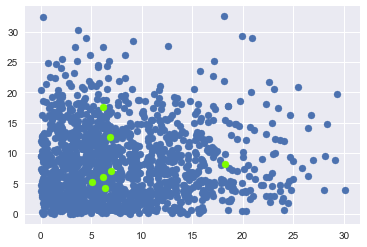

In [21]:
plot_2D_clusters(points,centers)

In [18]:
#this does pairwise euclidean distance matrix of all pairs of centers
np.triu(np.linalg.norm(centers[:, None, :] - centers[None, :, :], axis=-1),0)

array([[  0.        ,  15.06990225,  12.6436397 ,  15.56755708,
         15.08386583,  13.21880401,  18.42188259],
       [  0.        ,   0.        ,  14.73234002,  16.00577469,
         15.38893655,  22.05507669,  15.42068773],
       [  0.        ,   0.        ,   0.        ,  13.83512015,
         12.97272379,  19.03746379,  11.56763227],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         15.44499362,  15.70563428,  15.73450749],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  15.81524253,  14.95368616],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  19.05754444],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

In [20]:
import scipy.cluster.vq

centers, _ = scipy.cluster.vq.kmeans(points, k, iter=300)

In [22]:
np.savetxt(sys.stdout, centers, fmt="%.3f")

6.863 12.621 6.728 10.704 19.856
6.126 6.017 7.285 17.886 6.788
18.201 8.240 6.737 6.875 6.990
6.991 7.085 18.047 6.234 7.479
5.076 5.288 5.145 4.773 3.833
6.329 4.201 5.534 4.436 14.289
6.171 17.581 7.042 7.292 5.822


In [32]:
import scipy.spatial

a = np.array([[1, 2,19], [3, 4,20],[13,14,21],[15,16,22]])
b = np.array([[5, 6,23], [7, 8,24],[9,10,25],[11,12,26],[17,18,27]])
#a.sum(axis=0)
c = b - a[:, np.newaxis] 
print(c)
np.sqrt((b - a[:, np.newaxis])**2).sum(axis=2)
#c.max(axis=1)
#np.arange(0, 40, 10)[:, np.newaxis]
def dist(x,y):
    return np.apply_along_axis(
        np.linalg.norm,
        2,
        x[:, None, :] - y[None, :, :]
    )

print(dist(a,b))
print(scipy.spatial.distance.cdist(a,b))

[[[  4   4   4]
  [  6   6   5]
  [  8   8   6]
  [ 10  10   7]
  [ 16  16   8]]

 [[  2   2   3]
  [  4   4   4]
  [  6   6   5]
  [  8   8   6]
  [ 14  14   7]]

 [[ -8  -8   2]
  [ -6  -6   3]
  [ -4  -4   4]
  [ -2  -2   5]
  [  4   4   6]]

 [[-10 -10   1]
  [ -8  -8   2]
  [ -6  -6   3]
  [ -4  -4   4]
  [  2   2   5]]]
[[  6.92820323   9.8488578   12.80624847  15.77973384  24.        ]
 [  4.12310563   6.92820323   9.8488578   12.80624847  21.        ]
 [ 11.48912529   9.           6.92820323   5.74456265   8.24621125]
 [ 14.17744688  11.48912529   9.           6.92820323   5.74456265]]
[[  6.92820323   9.8488578   12.80624847  15.77973384  24.        ]
 [  4.12310563   6.92820323   9.8488578   12.80624847  21.        ]
 [ 11.48912529   9.           6.92820323   5.74456265   8.24621125]
 [ 14.17744688  11.48912529   9.           6.92820323   5.74456265]]


In [16]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas
import numpy as np
from datetime import datetime, timedelta

import requests
import os

        

def download_genes_vectors():
    #url='http://bioinformaticsalgorithms.com/data/realdatasets/Clustering/230genes_log_expression.txt'
    filename = '230genes_log_expression.txt'
    #r = requests.get(url, allow_redirects=True)
    #f = open(filename, 'wb')
    #f.write(r.content)
    #f.close()
    return filename


def str_to_d_vector(Str,D):
    result = np.fromstring(Str[1:-1], dtype=np.float64, sep=' ')
    dim = int(len(result)/D)
    return np.reshape(result,(dim,D))

def plot_2D_clusters(Points,Centers):
    plt.scatter(Points[:, 0], Points[:, 1])
    plt.scatter(Centers[:, 0], Centers[:, 1],color='chartreuse')
    plt.show()

    


In [38]:
def Distortion(Data,Centers):
    """returns total mean square distance of all Points to nearest centers"""
    n = len(Data)
    square_distances = ((Data - Centers[:, np.newaxis])**2).sum(axis=2)
    return np.min(square_distances, axis=0).sum() / n
    
def initialize_Centroids(Points, k):
    """returns k Centroids from the initial Points"""
    Centroids = Points.copy()
    np.random.shuffle(Centroids)
    return Centroids[:k]

def closest_centroid(Points, Centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    sqrdistances = ((Points - Centroids[:, np.newaxis])**2).sum(axis=2)
    #print(sqrdistances)
    return np.argmin(sqrdistances, axis=0)

def centers_of_gravity(Points,Closests,Centers):
    """returns a Centers Of Gravity of each closests points to center"""
    num_centers = len(Centers[0])
    for i in range(num_centers):
        #print(i)
        p = np.where(Closests == i)
        closest_points = Points[p]
        #print(closest_points)
        if len(closest_points) != 0:
            Centers[i] = closest_points.mean(axis=0)
        

        
def plus_plus(ds, k, random_state=42):
    """
    Create cluster centroids using the k-means++ algorithm.
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    Inspiration from here: https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
    """

    np.random.seed(random_state)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)


#print(Distortion(Points, centers))

#closests = closest_centroid(points, centers)
#print(closests)
#np.where(arr == 15)
#p = np.where(closests == 1)
#points[p]
#centers_of_gravity(points,centers)

#centers = initialize_Centroids(points,k)
    
genes_fn = download_genes_vectors()

df = pandas.read_csv(genes_fn, sep="\t")

points = df[df.columns.difference(['ORF', 'Name'])].as_matrix()
#print(df.head())
#print(points)
dim = points.shape[1]
k = 6


centers = plus_plus(points,k, random_state=np.random.randint(1000,2000, size=1))
print(centers,dim)


#plot_2D_clusters(points,centers)


[[ 0.13606155 -0.11103131 -0.18903382 -0.78240856 -0.75702325 -0.8559897
  -2.30451104]
 [-0.22650853  0.04394335  0.4150375   1.55639335  1.02914635  2.73696559
   2.73696559]
 [-0.0976108  -0.04264434  0.30400619 -0.20163386 -0.08406426 -1.10433666
  -2.74631277]
 [ 0.13606155  0.08926734  0.07400058  0.10469738  0.26881676  2.32192809
   2.05889369]
 [-0.61353165 -0.46466827  1.08926734 -0.12432814 -0.17632277  1.35845397
   3.64385619]
 [-0.17632277  0.08926734  0.577767    0.32192809  0.97143085  2.32192809
   1.02914635]] 7


In [39]:
distortions = np.zeros((1000))

for run in range(1000):
    centers = plus_plus(points,k, random_state=run)    
    for i in range(100):
        old_c = np.copy(centers)
        closests = closest_centroid(points, centers)
        centers_of_gravity(points,closests,centers)
        #print(centers)
        if (old_c==centers).all():
            break

    distortions[run] = Distortion(points,centers)
#plt.hist(x, bins = number of bins)
#plt.show()    


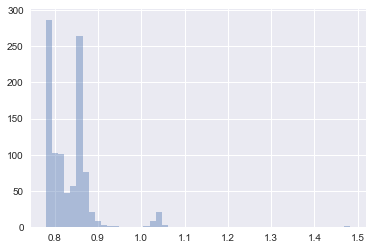

In [40]:

sns.distplot(distortions, kde=False);

In [41]:
print(np.count_nonzero(distortions))
print(distortions[999])

1000
0.797464915282


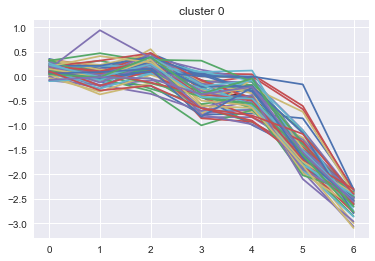

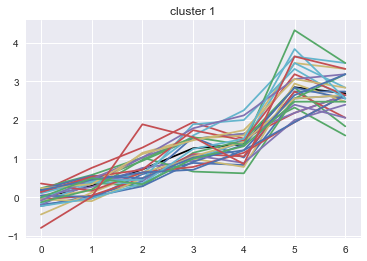

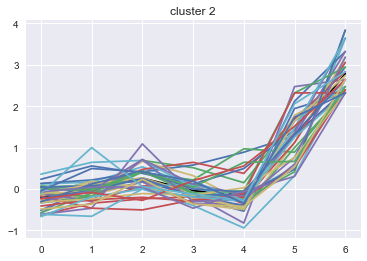

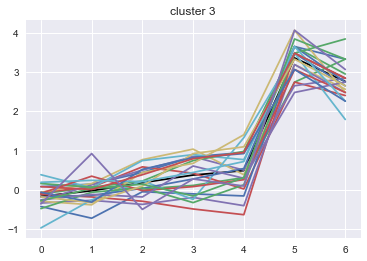

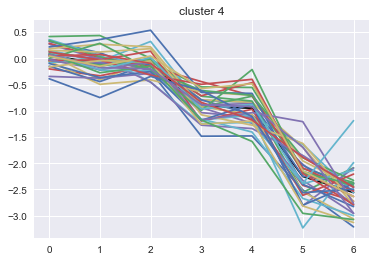

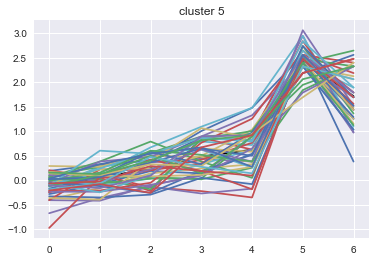

In [71]:
#df_vectors = df[df.columns.difference(['ORF', 'Name'])]

for plot in range(k):
    p = np.where(closests == plot)
    closest_points = points[p]
    #print(closest_points[0])
    #print(df_vectors.pivot_table())

    plt.title(f'cluster {plot}')
    plt.plot([0,1,2,3,4,5,6],np.average(closest_points,axis=0),color='black')
    for i in closest_points:
        plt.plot([0,1,2,3,4,5,6],i)
    plt.show()

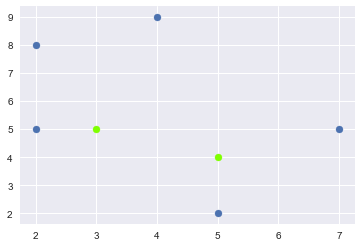

In [25]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import animation

import numpy as np

def str_to_d_vector(Str,D):
    result = np.fromstring(Str[1:-1], dtype=np.float64, sep=', ')
    dim = int(len(result)/D)
    return np.reshape(result,(dim,D))

def plot_2D_clusters(Points,Centers):
    plt.scatter(Points[:, 0], Points[:, 1])
    plt.scatter(Centers[:, 0], Centers[:, 1],color='chartreuse')
    plt.show()

C = '''[3.0, 5.0, 5.0, 4.0]'''

P = '''[2.0, 8.0, 2.0, 5.0, 4.0, 9.0, 7.0, 5.0, 5.0, 2.0]'''

dim = 2
k = 7

centers = str_to_d_vector(C,dim)
points = str_to_d_vector(P,dim)

plot_2D_clusters(points,centers)

    
    
    


In [26]:
def max_dist(Data, Centers):
    distances = np.sqrt(((Data - Centers[:, np.newaxis])**2).sum(axis=2))
    print(distances)
    closests = np.argmin(distances,axis=0)
    print(closests)
    maxd = []
    for i in range(len(Centers[0])):
        p = np.where(closests == i)
        closest_points = distances[i][p]
        if len(closest_points) != 0:
            maxd.append(closest_points.max(axis=0))
    print(maxd)


def Distortion(Data,Centers):
    """returns total mean square distance of all Points to nearest centers"""
    n = len(Data)
    square_distances = ((Data - Centers[:, np.newaxis])**2).sum(axis=2)
    return np.min(square_distances, axis=0).sum() / n
    
    
max_dist(points,centers) 
print(Distortion(points,centers))

[[ 3.16227766  1.          4.12310563  4.          3.60555128]
 [ 5.          3.16227766  5.09901951  2.23606798  2.        ]]
[0 0 0 1 1]
[4.1231056256176606, 2.2360679774997898]
7.4
